In [ ]:
from google.colab import files
uploaded = files.upload()

Saving student_feedback.csv to student_feedback.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("student_feedback.csv")
df.head()


,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [ ]:
df.describe()


,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,500.000000,500.000000,7.497502,6.081918,5.942058,5.430569,5.474525,5.636364,5.662338,5.598402
std,289.108111,289.108111,1.692998,2.597168,1.415853,2.869046,2.874648,2.920212,2.891690,2.886617
min,0.000000,0.000000,5.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,250.000000,250.000000,6.000000,4.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,500.000000,500.000000,8.000000,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000
75%,750.000000,750.000000,9.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,1000.000000,1000.000000,10.000000,10.000000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [ ]:
df.drop(columns=["Unnamed: 0"], inplace=True)


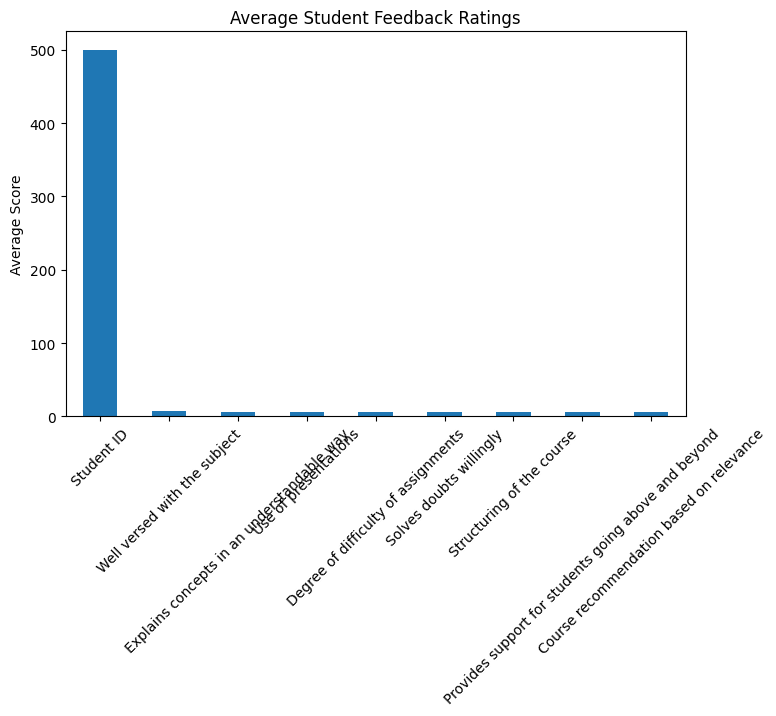

In [ ]:
avg_scores = df.mean()
avg_scores
plt.figure(figsize=(8,5))
avg_scores.plot(kind="bar")
plt.title("Average Student Feedback Ratings")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.show()


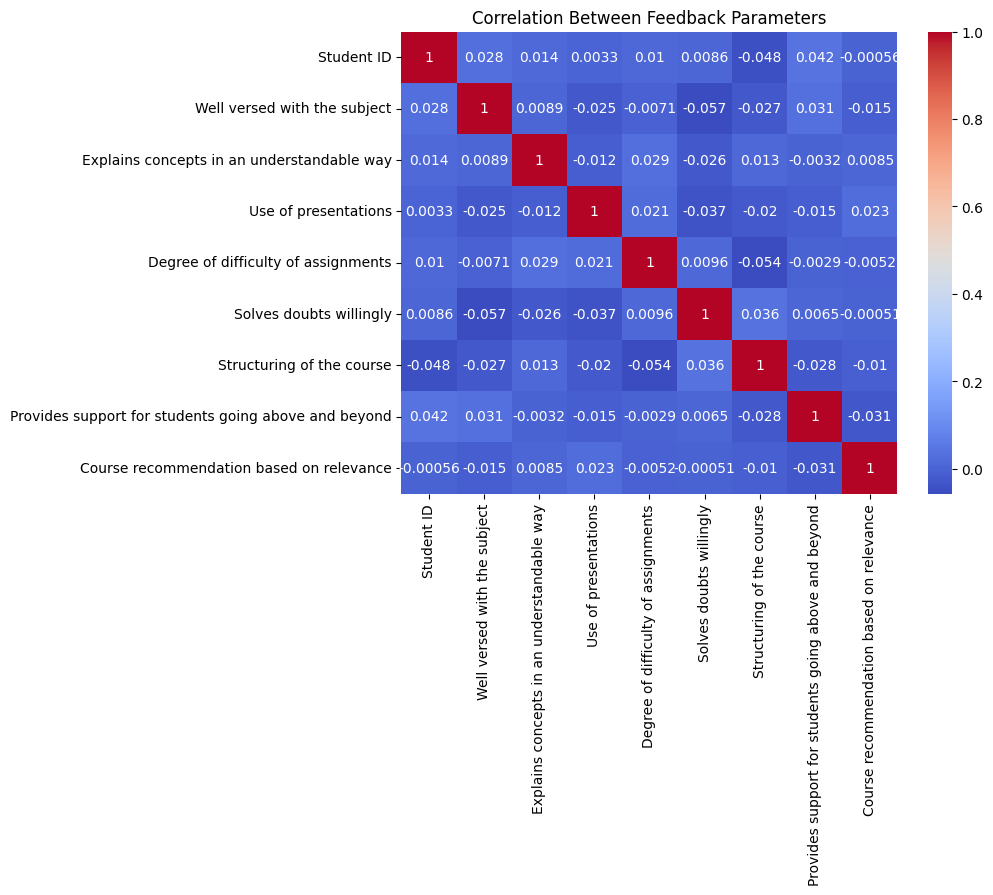

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Feedback Parameters")
plt.show()


In [ ]:
overall_satisfaction = df['Course recommendation based on relevance'].mean()
print("Overall Satisfaction Score:", round(overall_satisfaction, 2))


Overall Satisfaction Score: 5.6


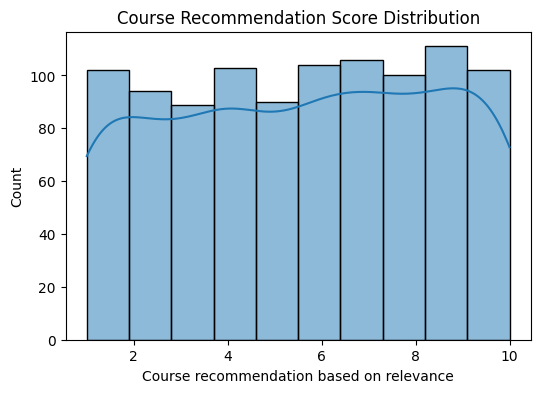

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['Course recommendation based on relevance'], bins=10, kde=True)
plt.title("Course Recommendation Score Distribution")
plt.show()


In [ ]:
print("Key Insights:")
print("Highest Rated Aspect:", avg_scores.idxmax())
print("Lowest Rated Aspect:", avg_scores.idxmin())


Key Insights:
Highest Rated Aspect: Student ID
Lowest Rated Aspect: Degree of difficulty of assignments


In [ ]:
df.columns = df.columns.str.strip()


In [ ]:
df.rename(columns={
    "Student ID": "Student_ID",
    "Well versed with the subject": "Subject_Knowledge",
    "Explains concepts in an understandable way": "Concept_Clarity",
    "Use of presentations": "Presentation_Quality",
    "Degree of difficulty of assignments": "Assignment_Difficulty",
    "Solves doubts willingly": "Doubt_Clarification",
    "Structuring of the course": "Course_Structure",
    "Provides support for students going above and beyond": "Student_Support",
    "Course recommendation based on relevance": "Course_Recommendation"
}, inplace=True)


In [ ]:
print(df.columns)


Index(['Student_ID', 'Subject_Knowledge', 'Concept_Clarity',
       'Presentation_Quality', 'Assignment_Difficulty', 'Doubt_Clarification',
       'Course_Structure', 'Student_Support', 'Course_Recommendation'],
      dtype='object')


In [ ]:
def generate_feedback(row):
    if row["Course_Recommendation"] >= 8:
        return "The course was very informative and well structured. The instructor explained concepts clearly and was very supportive."
    elif row["Course_Recommendation"] >= 5:
        return "The course was good overall but some areas could be improved. The sessions were useful."
    else:
        return "The course was difficult to follow and the structure could be improved."

df["Feedback_Text"] = df.apply(generate_feedback, axis=1)

df[["Course_Recommendation", "Feedback_Text"]].head()


,Course_Recommendation,Feedback_Text
0,8,The course was very informative and well struc...
1,9,The course was very informative and well struc...
2,1,The course was difficult to follow and the str...
3,6,The course was good overall but some areas cou...
4,9,The course was very informative and well struc...


from matplotlib import pyplot as plt
_df_0['Course_Recommendation'].plot(kind='hist', bins=20, title='Course_Recommendation')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Feedback_Text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Course_Recommendation'].plot(kind='line', figsize=(8, 4), title='Course_Recommendation')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['Feedback_Text'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='Course_Recommendation', y='Feedback_Text', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

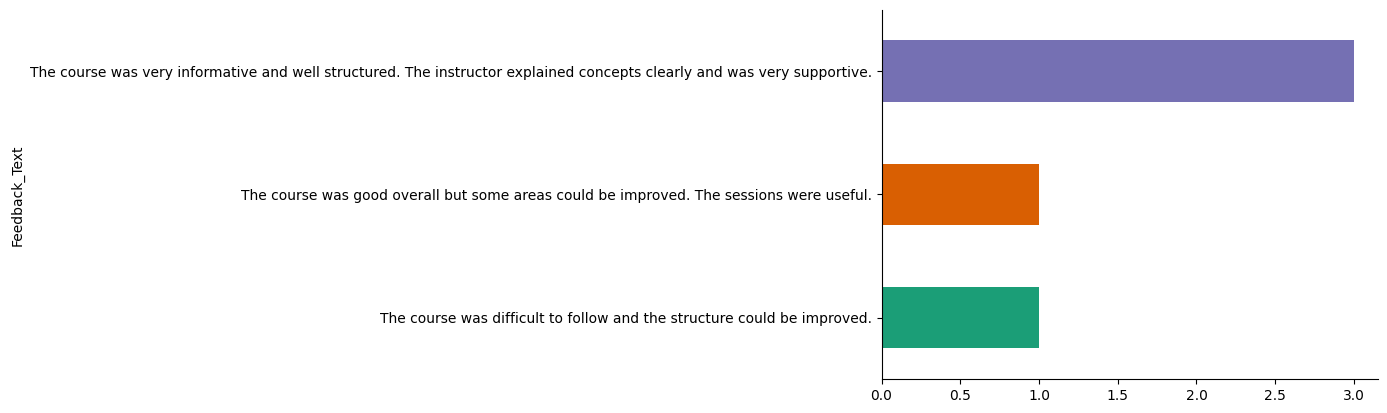

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Feedback_Text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from textblob import TextBlob


In [ ]:
df["Sentiment_Score"] = df["Feedback_Text"].apply(
    lambda x: TextBlob(x).sentiment.polarity
)


In [ ]:
def sentiment_label(score):
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

df["Sentiment_Label"] = df["Sentiment_Score"].apply(sentiment_label)

df[["Feedback_Text", "Sentiment_Label"]].head()


,Feedback_Text,Sentiment_Label
0,The course was very informative and well struc...,Positive
1,The course was very informative and well struc...,Positive
2,The course was difficult to follow and the str...,Negative
3,The course was good overall but some areas cou...,Positive
4,The course was very informative and well struc...,Positive


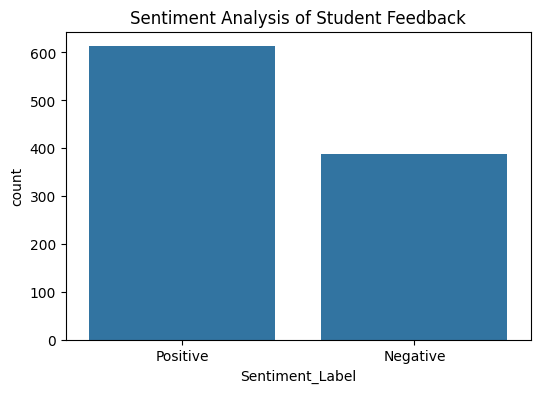

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x="Sentiment_Label", data=df)
plt.title("Sentiment Analysis of Student Feedback")
plt.show()


In [ ]:
df.groupby("Sentiment_Label")["Course_Recommendation"].mean()


,Course_Recommendation
Sentiment_Label,
Negative,2.497423
Positive,7.561175
